<a href="https://colab.research.google.com/github/shahrameshv/PGDDS/blob/main/Starter_code_Assignment_CNN_Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Starter_code_Assignment_CNN_Skin_Cancer**
#### - from **Ramesh Shah[link text](https://)**

**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Importing Skin Cancer Data**

To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
# importing the required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import random

from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [1]:
# importing good drive
from google.colab import drive
drive.mount('/content/gdrive')                                  #mounting

Mounted at /content/gdrive


The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant. 

The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [59]:
# Unzipping assignment data supplied by Upgrad
!unzip "/content/gdrive/My Drive/CNN_assignment.zip"

Archive:  /content/gdrive/My Drive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflatin

In [13]:
#Moving unzipped data to Data folder
!mv "/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration" "/content/gdrive/My Drive/Data"

In [14]:
# Verifying the unzipped data
!ls "/content/gdrive/My Drive/Data"

Test  Train


In [19]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
base_dir = pathlib.Path("/content/gdrive/My Drive/Data")
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Data/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Data/Test")

In [20]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

Use 80% of the images for training, and 20% for validation.

In [21]:
# Setting loading parameters as per assignment guide.
batch_size = 32
img_height = 180
img_width = 180
train_val = 0.2
seed = 123

In [22]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed = seed ,
    validation_split= train_val,
    subset = "training",
    interpolation='bilinear'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [23]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed = seed ,
    validation_split= train_val,
    subset = "validation",
    interpolation='bilinear'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [24]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

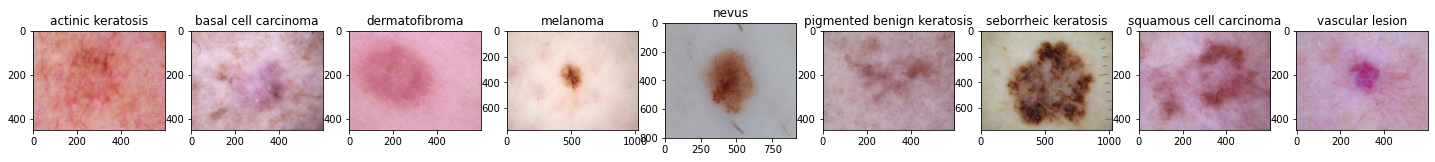

In [63]:
fig = plt.figure(figsize=(25,25))
for i in range(len(class_names)):
    img_folder = data_dir_train/class_names[i]
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=plt.imread(image_path)
    ax=plt.subplot(1,9,i+1)
    ax.title.set_text(class_names[i])
    plt.imshow(img)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [26]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [27]:
# model architecture
model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32,(5, 5), padding='same', activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(9))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [28]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [30]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 46s 89ms/step - loss: 2.1185 - accuracy: 0.2260 - val_loss: 1.8806 - val_accuracy: 0.3557
Epoch 2/20
56/56 [==============================] - 2s 37ms/step - loss: 1.8082 - accuracy: 0.3499 - val_loss: 1.7974 - val_accuracy: 0.3535
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.5483 - accuracy: 0.4554 - val_loss: 1.4985 - val_accuracy: 0.4720
Epoch 4/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4650 - accuracy: 0.4944 - val_loss: 1.4596 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.3778 - accuracy: 0.5100 - val_loss: 1.4789 - val_accuracy: 0.4609
Epoch 6/20
56/56 [==============================] - 2s 36ms/step - loss: 1.3072 - accuracy: 0.5368 - val_loss: 1.4448 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.2244 - accuracy: 0.5564 - val_loss: 1.4553 - val_accuracy: 0.5101
Epoch 8/20
5

### Visualizing training results

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

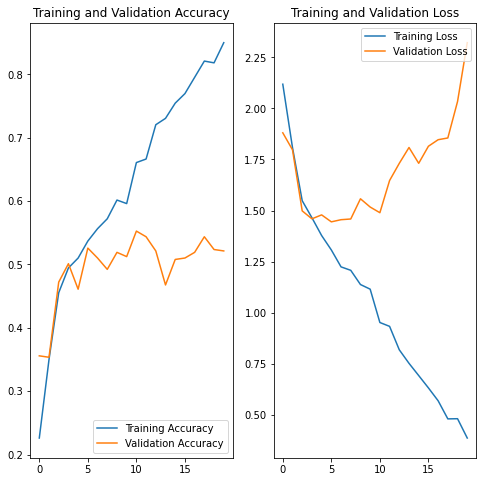

In [31]:
# Run result with 5*5 input kernel
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings from first CNN Model Run
 - After 5 epochs the validation accuracy stopped improving while the training accuracy is improving till 20 epochs. 
 - Clear sign of overfitting.
 - Validation loss reducing trend stopped after 5 epochs and started increasing after 10 epochs

In [32]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# doing data augmentation with Random Flit & Random Rotation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

/content/gdrive/My Drive/Data/Train/vascular lesion/ISIC_0030722.jpg


Text(0.5, 1.0, 'Augmented Image')

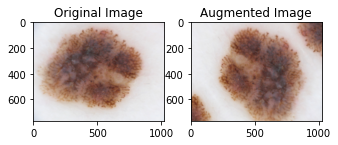

In [33]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
fig = plt.figure(figsize=(8,8))
img_folder= os.path.join(data_dir_train, class_names[4])
print(image_path)
file = random.choice(os.listdir(img_folder))
image_path = os.path.join(img_folder, file)
img1=plt.imread(image_path)
img2=tf.expand_dims(img1, 0)
img3=data_augmentation(img2)
plt.subplot(3, 3, 1)
plt.imshow(img1)
plt.title("Original Image")
plt.subplot(3, 3, 2)
plt.imshow(img3[0])
plt.title("Augmented Image")

### Todo:
### Create the model, compile and train the model


In [34]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
# model architecture
model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))
model.add(RandomFlip("horizontal_and_vertical"))
model.add(RandomRotation(0.2))
model.add(Conv2D(32,(5, 5), padding='same', activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(9))
model.add(Activation('softmax'))


### Compiling the model

In [35]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)       

### Training the model

In [37]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 45ms/step - loss: 2.2144 - accuracy: 0.1836 - val_loss: 2.0449 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 2s 42ms/step - loss: 2.0420 - accuracy: 0.1858 - val_loss: 2.0196 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 2s 42ms/step - loss: 2.0167 - accuracy: 0.2037 - val_loss: 1.9951 - val_accuracy: 0.2282
Epoch 4/20
56/56 [==============================] - 2s 42ms/step - loss: 2.0188 - accuracy: 0.2093 - val_loss: 2.0461 - val_accuracy: 0.1946
Epoch 5/20
56/56 [==============================] - 2s 42ms/step - loss: 1.9577 - accuracy: 0.2455 - val_loss: 1.8764 - val_accuracy: 0.3154
Epoch 6/20
56/56 [==============================] - 2s 42ms/step - loss: 1.9031 - accuracy: 0.2930 - val_loss: 1.9822 - val_accuracy: 0.2327
Epoch 7/20
56/56 [==============================] - 2s 42ms/step - loss: 1.8268 - accuracy: 0.3214 - val_loss: 1.7639 - val_accuracy: 0.3691
Epoch 8/20
56

### Visualizing the results

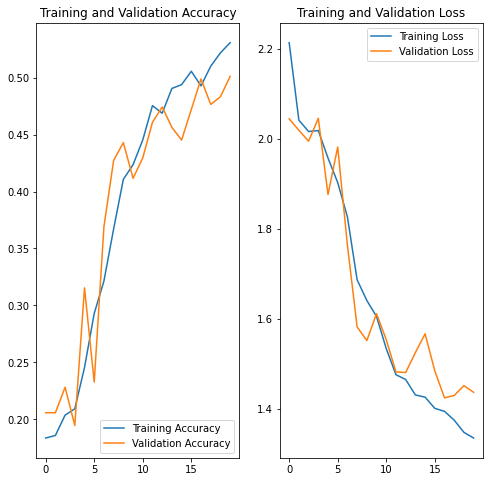

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [39]:
## Your code goes here.
total_cnt = len(list(data_dir_train.glob('*/*.jpg')))
print("Total Train Count : ", total_cnt)
for i in range(len(class_names)) :
    img_folder= os.path.join(data_dir_train, class_names[i])
    img_folder = pathlib.Path(img_folder)
    cnt = len(list(img_folder.glob('*.jpg')))
    print(class_names[i], " : ", cnt)

Total Train Count :  2239
actinic keratosis  :  114
basal cell carcinoma  :  376
dermatofibroma  :  95
melanoma  :  438
nevus  :  357
pigmented benign keratosis  :  462
seborrheic keratosis  :  77
squamous cell carcinoma  :  181
vascular lesion  :  139


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

> *seborrheic keratosis has a count of 77 samples.* <BR>
> *dermatofibroma samples are also less at 95 samples.*

#### - Which classes dominate the data in terms proportionate number of samples?

> *pigmented benign keratosis at count of 462 samples.* <BR>
> *melanoma samples are also high at 438 samples.*

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [40]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [41]:

import Augmentor
for i in class_names:
    path_to_training_dataset= os.path.join(data_dir_train, i)
    p = Augmentor.Pipeline(path_to_training_dataset)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBC7BA49690>: 100%|██████████| 500/500 [00:18<00:00, 26.78 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBC1C58E410>: 100%|██████████| 500/500 [00:18<00:00, 27.14 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBC1C5E9D10>:   0%|          | 1/500 [00:00<00:51,  9.65 Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBC1F0E1650>: 100%|██████████| 500/500 [00:19<00:00, 25.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBC1F634E50>: 100%|██████████| 500/500 [01:27<00:00,  5.72 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBC1C5B7C50>:   0%|          | 1/500 [00:00<01:08,  7.31 Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FBC1C5E8810>: 100%|██████████| 500/500 [01:19<00:00,  6.31 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBC1F059A10>: 100%|██████████| 500/500 [00:18<00:00, 26.36 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBC1C5B6F10>:   0%|          | 1/500 [00:00<01:24,  5.90 Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FBC1F07E810>: 100%|██████████| 500/500 [00:41<00:00, 12.01 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBC1F09DA10>:   0%|          | 2/500 [00:00<00:34, 14.40 Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBC1F0DC390>: 100%|██████████| 500/500 [00:19<00:00, 26.23 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBC1F0E1850>: 100%|██████████| 500/500 [00:20<00:00, 24.79 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027254.jpg_666361bd-2c29-453f-9df3-40c2e9a27320.jpg',
 '/content/gdrive/My Drive/Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030463.jpg_72405f43-50b6-408e-a2f4-264785752589.jpg',
 '/content/gdrive/My Drive/Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027447.jpg_b3c77789-eb2a-444c-8e62-4aa555fb564c.jpg',
 '/content/gdrive/My Drive/Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032437.jpg_56233bbd-de7d-48de-9b8b-b6c487c5d096.jpg',
 '/content/gdrive/My Drive/Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031108.jpg_861f178d-0f69-480e-946a-6cc10f6bba9a.jpg',
 '/content/gdrive/My Drive/Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_a59c54e6-c870-48e2-b368-f788d838192c.jpg',
 '/content/gdrive/My Drive/Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_00268

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [45]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [49]:
# New total counts per class
old_cnt = len(list(data_dir_train.glob('*/*.jpg')))
new_cnt = len(list(data_dir_train.glob('*/*/*.jpg')))
total_cnt = old_cnt + new_cnt
print("Total Train Count : ", total_cnt)
for i in range(len(class_names)) :
    img_folder= os.path.join(data_dir_train, class_names[i])
    img_folder = pathlib.Path(img_folder)
    cnt1 = len(list(img_folder.glob('*.jpg')))
    cnt2 = len(list(img_folder.glob('*/*.jpg')))
    cnt = cnt1 + cnt2
    print(class_names[i], " : ", cnt)

Total Train Count :  6739
actinic keratosis  :  614
basal cell carcinoma  :  876
dermatofibroma  :  595
melanoma  :  938
nevus  :  857
pigmented benign keratosis  :  962
seborrheic keratosis  :  577
squamous cell carcinoma  :  681
vascular lesion  :  639


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [50]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [51]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed = seed ,
    validation_split= train_val,
    subset = "training",
    interpolation='bilinear'
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [52]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Todo:** Create a validation dataset

In [53]:
val_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed = seed ,
    validation_split= train_val,
    subset = "validation",
    interpolation='bilinear'
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [54]:
# model architecture
model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=(180, 180, 3)))
model.add(RandomFlip("horizontal_and_vertical"))
model.add(RandomRotation(0.2))
model.add(Conv2D(32,(3, 3), padding='same', activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(5024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(9))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [55]:
## your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
random_flip_2 (RandomFlip)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 64)       

#### **Todo:**  Train your model

In [57]:
## Your code goes here, note: train your model for 20 epochs
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 39s 223ms/step - loss: 2.5139 - accuracy: 0.1769 - val_loss: 2.1012 - val_accuracy: 0.1856
Epoch 2/50
169/169 [==============================] - 40s 229ms/step - loss: 1.8707 - accuracy: 0.2661 - val_loss: 1.9008 - val_accuracy: 0.2279
Epoch 3/50
169/169 [==============================] - 38s 222ms/step - loss: 1.7265 - accuracy: 0.3149 - val_loss: 1.6862 - val_accuracy: 0.3497
Epoch 4/50
169/169 [==============================] - 43s 250ms/step - loss: 1.6357 - accuracy: 0.3659 - val_loss: 1.5279 - val_accuracy: 0.4098
Epoch 5/50
169/169 [==============================] - 38s 222ms/step - loss: 1.5084 - accuracy: 0.4136 - val_loss: 1.4880 - val_accuracy: 0.3942
Epoch 6/50
169/169 [==============================] - 39s 228ms/step - loss: 1.4494 - accuracy: 0.4266 - val_loss: 1.4635 - val_accuracy: 0.4343
Epoch 7/50
169/169 [==============================] - 38s 222ms/step - loss: 1.4116 - accuracy: 0.4484 - val_loss: 1.4965 - val_ac

#### **Todo:**  Visualize the model results

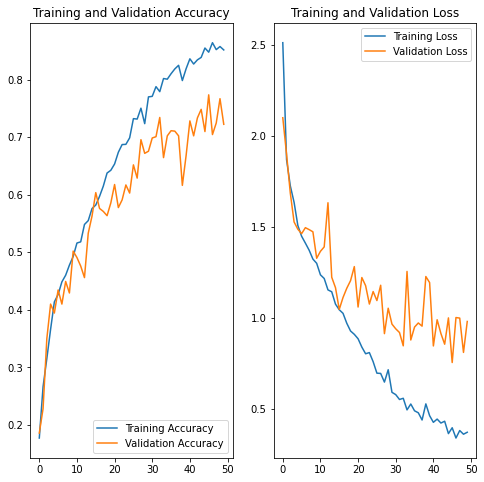

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



We can see here that the training as well as the validation accuracy as well as the Loss has increased in a good amount keeping the gap more or less the same as the previous model.

Hence no chance of overfitting. This model is good to go now. Here, if more than 30 epochs are used, the results will be better.
